### (a)

\begin{align*}
p(y;\lambda) = & \ \frac {e^{- \lambda} \lambda^y} {y!} \\
= & \ \frac {1} {y!} \exp (- \lambda) \exp (\log \lambda^y) \\
= & \ \frac {1} {y!} \exp ((\log \lambda)y - e^{\log \lambda}) \\
= & \ b(y) \exp ( \eta^T T(y) - \alpha (\eta) )
\end{align*}

and,

\begin{align*}
b(y) = & \ \frac {1} {y!} \\
\eta = & \ \log \lambda \\
T(y) = & \ y \\
\alpha(\eta) = & \ \exp(\eta) \\
= & \ \exp(\log \lambda) \\
= & \ \lambda
\end{align*}

### (b)

\begin{align*}
g(\eta) = & \ E[T(y); \eta] \\
= & \ E[y; \eta] \\
= & \ \lambda \\
= & \ e^\eta
\end{align*}

### (c)

\begin{align*}
\ell = & \ \log p(y^{(i)} \vert x^{(i)}; \theta) \\
= & \ \log \frac {e^{-e^{\theta^T x^{(i)}}} e^{y\theta^Tx}} {y^{(i)}!} \\
\end{align*}

\begin{align*}
\frac {\partial} {\partial \theta_j} \ell(\theta) = & \ \frac {\partial} {\partial \theta_j} ( \log e^{-e^{\theta^Tx^{(i)}} + y \theta^T x^{(i)}} - \log y^{(i)}) \\
= & \ \frac {\partial} {\partial \theta_j} (-e^{\theta^T x^{(i)}} + y \theta^T x^{(i)}) \\
= & \ - e^{\theta^T x^{(i)}} x_{j}^{(i)} + y x_{j}^{(i)} \\
= & \ (- e^{\theta^T x^{(i)}} + y) x_j^{(i)}
\end{align*}

and,
\begin{align*}
h_\theta(x) = & \ E[y \vert x; \theta] \\
= & \ \lambda \\
= & \ e^\eta \\
= & \ e^{\theta^T x}
\end{align*}

so,

\begin{align*}
\theta_j := & \ \theta_j + \alpha \frac {\partial} {\partial \theta_j} \ell(\theta) \\
= & \ \theta_j + \alpha (- e^{\theta^T x^{(i)}} + y) x_j^{(i)} \\
= & \ \theta_j + \alpha (y - h_\theta(x)) x_j^{(i)}
\end{align*}

then,

\begin{align*}
\theta := \theta + \alpha (y - h_\theta(x)) x^{(i)}
\end{align*}

### (d)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.util as util
from src.p03d_poisson import PoissonRegression # code implements here

In [2]:
ds4_train_path = './data/ds4_train.csv'
ds4_valid_path = './data/ds4_valid.csv'

In [3]:
x_train, y_train = util.load_dataset(
    ds4_train_path, add_intercept=False
)
x_valid, y_valid = util.load_dataset(
    ds4_valid_path, add_intercept=False
)

In [4]:
# we should choose a good step size
# otherwise it will cause 'nan' or slow learning
pr = PoissonRegression(step_size=1e-10)
pr.fit(x_train, y_train)

In [5]:
def plot(y_label, y_pred, title):
    plt.plot(y_label, 'go', label='label')
    plt.plot(y_pred, 'rx', label='pred')
    plt.suptitle(title, fontsize=12)
    plt.legend(loc='best')

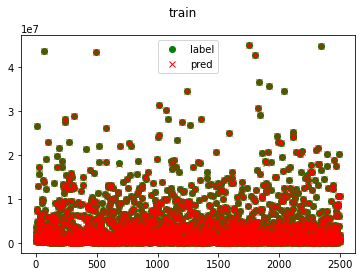

In [6]:
y_train_pred = pr.predict(x_train)
plot(y_train, y_train_pred, 'train')

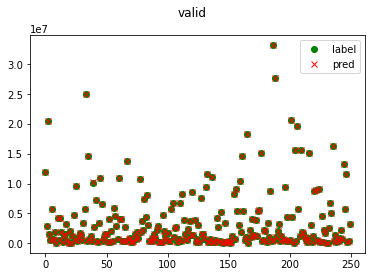

In [7]:
y_valid_pred = pr.predict(x_valid)
plot(y_valid, y_valid_pred, 'valid')